## Engineering Rare Categories

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare.

As we  know, when infrequent labels are so few, it is hard to derive reliable information from them. But more importantly, infrequent labels tend to appear only on train set or only on the test set:

- If only on the train set, they may cause over-fitting
- If only on the test set, our machine learning model will not know how to score them

Therefore, to avoid this behaviour, we tend to group those into a new category called 'Rare' or 'Other'.

Rare labels can appear in low or highly cardinal variables. There is no rule of thumb to determine how many different labels are considered high cardinality. It depend as well on how many observations there are in the dataset. In a dataset with 1,000 observations, 100 labels may seem a lot, whereas in a dataset with 100,000 observations it may not be so high.

Highly cardinal variables tend to have many infrequent or rare categories, whereas low cardinal variables, may have only 1 or 2 rare labels.

### Note the following:

**Note that grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the common practice in machine learning for business.**

- Grouping categories into rare for variables that show low cardinality may or may not improve model performance, however, we tend to re-group them into a new category to smooth model deployment.

- Grouping categories into rare for variables with high cardinality, tends to improve model performance as well.


## In this demo:

We will learn how to re-group rare labels under a new category called rare, and compare the implications of this encoding in variables with:

- One predominant category
- A small number of categories
- High cardinality

For this demo, we will use the House Price dataset. We will re-group variables using pandas an feature-engine.

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.encoding import RareLabelEncoder

pd.set_option('display.max_columns', None) # to display total number of columns present in the dataset

In [2]:
# load data

data = pd.read_csv('house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'O']
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Important

The identification of rare labels should be done using only the training set, and then propagated to the test set. Rare labels should be identified in the training set only. In practice, what we will do is identify **non-rare labels**, and then any other label, either in the train or the test or future live data that is not in that list of **non-rare** labels, will be re=grouped into the new category.

For example, let's imagine that we have in the training set the variable 'city' with the labels 'London', 'Manchester' and 'Yorkshire'. 'Yorkshire' is present in less than 5% of the observations so we decide to re-group it in a new category called 'Rare'.

In the test set, we should also replace 'Yorkshire' by 'Rare', regardless of the percentage of observations for 'Yorkshire' in the test set. In addition, if in the test set we find the category 'Milton Keynes', that was not present in the training set, we should also replace that category by 'Rare'. On other words, all categories present in test set, not present in the list of **non-rare** categories derived from the training set, should be treated as rare values and re-grouped into 'Rare'.

In [7]:
# let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictors
    data.SalePrice, # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

## Variables with one dominant category

In [13]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in X_train.columns:
    
    if X_train[col].dtypes == 'O':
        
        if X_train[col].nunique() < 3:
            print(X_train.groupby(col)[col].count()/len(X_train))
            print()

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



### Conclusion

The 3 variables above, Street, Utilities and CentralAir, show one dominating category which accounts for more than 93-99% of the observations. Re-grouping the rare label in this situation does not make any sense. We could determine if these variables are useful with exploratory analysis, or any feature selection algorithm, or drop the variables altogether.

## Variables with few categoriesm

In [17]:
# print the cols with the unique labels count
for col in cat_cols:
    print('{} : {} '.format(col, X_train[col].nunique()))

MSZoning : 5 
Street : 2 
Alley : 2 
LotShape : 4 
LandContour : 4 
Utilities : 2 
LotConfig : 5 
LandSlope : 3 
Neighborhood : 25 
Condition1 : 9 
Condition2 : 5 
BldgType : 5 
HouseStyle : 8 
RoofStyle : 6 
RoofMatl : 6 
Exterior1st : 15 
Exterior2nd : 16 
MasVnrType : 4 
ExterQual : 4 
ExterCond : 5 
Foundation : 6 
BsmtQual : 4 
BsmtCond : 4 
BsmtExposure : 4 
BsmtFinType1 : 6 
BsmtFinType2 : 6 
Heating : 6 
HeatingQC : 5 
CentralAir : 2 
Electrical : 5 
KitchenQual : 4 
Functional : 6 
FireplaceQu : 5 
GarageType : 6 
GarageFinish : 3 
GarageQual : 5 
GarageCond : 5 
PavedDrive : 3 
PoolQC : 2 
Fence : 4 
MiscFeature : 3 
SaleType : 9 
SaleCondition : 6 


In [21]:
# the columns in the below list have only 4 different labels

cols = ['MasVnrType', 'ExterQual', 'BsmtCond']

for col in cols:
    print(X_train.groupby(col)[col].count()/len(X_train))
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.595890
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



The variables above have only 4 categories, and in all three cases, there is at least one category that is infrequent, that is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else.

For example the first variable MasVnrType shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label will leave the variable in the same situation.

The second variable ExterQual, contains 2 rare labels Ex and Fa, we could group these 2 into a new label called 'Rare'.

The third variable BsmtCond contains 3 rare labels, Fa, Gd and Po, so we could group these 3 under the new label 'Rare'.

## Variable with high cardinality

In [22]:
# let's explore examples in which variables have several categories, say more than 10

multi_cat_cols = []

for col in cat_cols:
    
    if X_train[col].nunique() > 10:
        multi_cat_cols.append(col)
        
        print(X_train.groupby(col)[col].count()/len(X_train))
        print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

In [23]:
multi_cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

We can see that many categories are rare in the 3 categorical variables printed above.

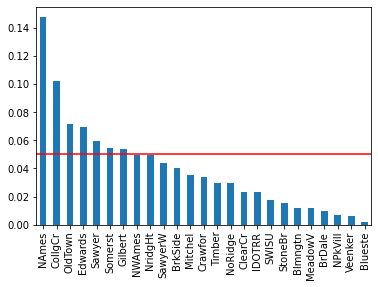

In [37]:
d = X_train['Neighborhood'].value_counts(ascending = False)/len(X_train)
d.plot.bar()
plt.axhline(y = 0.05, c = 'red')
plt.show();

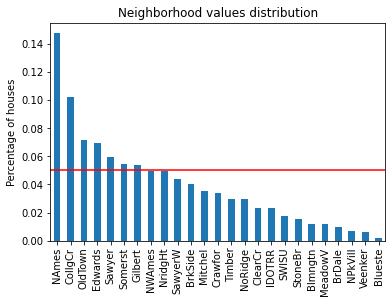

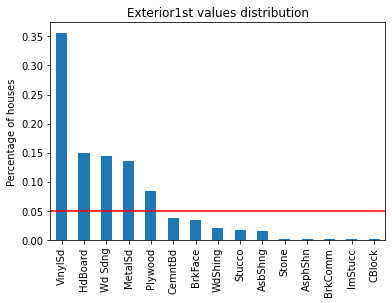

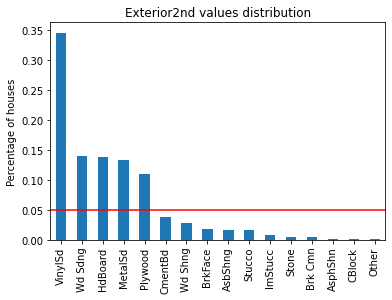

In [40]:
for col in multi_cat_cols:
    
    (X_train[col].value_counts(ascending=False)/len(X_train)).plot.bar()
    plt.axhline(y = 0.05, c= 'red')
    plt.title('{} values distribution'.format(col))
    plt.ylabel('Percentage of houses')
    plt.show()

## Re-grouping rare labels with pandas

In [52]:
test = X_train.groupby('Neighborhood')['Neighborhood'].count()/len(X_train)
test

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

In [60]:
test[test > 0.05].index.values

array(['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer',
       'Somerst'], dtype=object)

In [62]:
[x for x in test.loc[test>0.05].index.values]

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [63]:
# first lets define a function that has no rare labels
# say considering value percentage of greater than 5% 
# tolerance -- this is the cut off percentage value which will be considered for rarity
def find_non_rare_labels(X_train, var, tolerance):
    
    test = X_train.groupby(var)[var].count()/len(X_train)
    
    non_rare_labels = [x for x in test.loc[test > tolerance].index.values]
    
    return non_rare_labels

In [64]:
# these are the labels in Neigborhood that are non rare
find_non_rare_labels(X_train, 'Neighborhood', 0.05)

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [69]:
X_train['Neighborhood'].unique()

array(['CollgCr', 'ClearCr', 'BrkSide', 'Edwards', 'SWISU', 'Sawyer',
       'Crawfor', 'NAmes', 'Mitchel', 'Timber', 'Gilbert', 'Somerst',
       'MeadowV', 'OldTown', 'BrDale', 'NWAmes', 'NridgHt', 'SawyerW',
       'NoRidge', 'IDOTRR', 'NPkVill', 'StoneBr', 'Blmngtn', 'Veenker',
       'Blueste'], dtype=object)

In [72]:
# now we can find the labels in Neighborhood that are rare ( which are not in not rare)
[x for x in X_train['Neighborhood'].unique()
 if x not in find_non_rare_labels(X_train, 'Neighborhood', 0.05)]

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [73]:
# create a function to perform all these rare encodings

def rare_encoding(X_train, X_test, var, tolerance):
    
    # make copies
    train = X_train.copy()
    test = X_test.copy()
    
    # find the non rare ones - or more frequent labels
    frequent_labels = find_non_rare_labels(train, var, tolerance)
    
    # now map the rare ones for both the training and test data
    train[var] = np.where(train[var].isin(frequent_labels), train[var], 'Rare')
    test[var] = np.where(test[var].isin(frequent_labels), test[var], 'Rare')
    
    return train, test

In [74]:
for variable in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

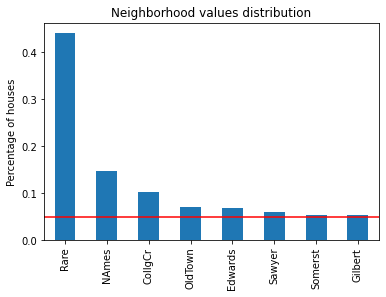

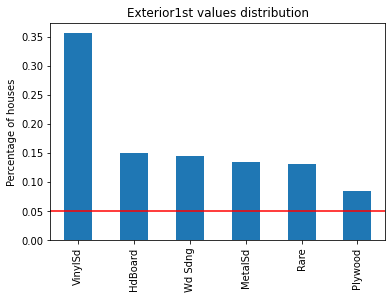

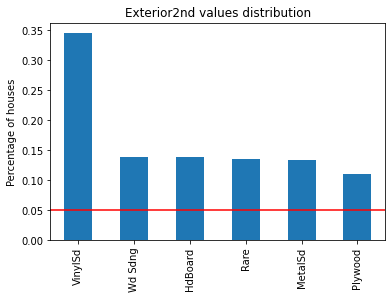

In [75]:
# lets plot and check
for col in multi_cat_cols:
    
    (X_train[col].value_counts(ascending=False)/len(X_train)).plot.bar()
    plt.axhline(y = 0.05, c= 'red')
    plt.title('{} values distribution'.format(col))
    plt.ylabel('Percentage of houses')
    plt.show()

And now let's encode the low cardinal variables.

In [76]:
for variable in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

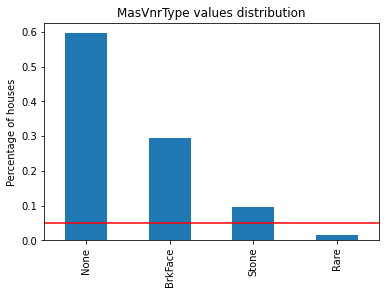

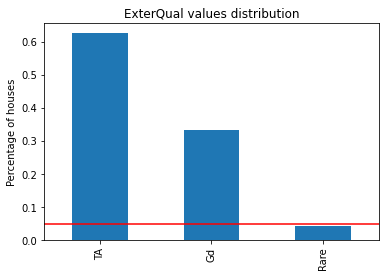

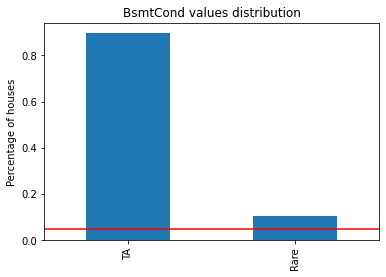

In [77]:
# lets plot and check
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    
    (X_train[col].value_counts(ascending=False)/len(X_train)).plot.bar()
    plt.axhline(y = 0.05, c= 'red')
    plt.title('{} values distribution'.format(col))
    plt.ylabel('Percentage of houses')
    plt.show()

## Encoding Rare Labels with Feature-Engine

In [78]:
# let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictors
    data.SalePrice, # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [79]:
# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-group rare categories
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'BsmtCond'] # variables to re-group
)  

In [81]:
rare_encoder.fit(X_train.fillna('Missing'))

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable ExterQual is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


RareLabelEncoder(n_categories=4,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'ExterQual', 'BsmtCond'])

In [82]:
rare_encoder.encoder_dict_

{'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst',
        'Gilbert'],
       dtype='object'),
 'Exterior1st': Index(['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood'], dtype='object'),
 'Exterior2nd': Index(['VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'Plywood'], dtype='object'),
 'MasVnrType': Index(['None', 'BrkFace', 'Stone'], dtype='object'),
 'ExterQual': array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object),
 'BsmtCond': Index(['TA'], dtype='object')}

In [83]:
rare_encoder.variables

['Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'BsmtCond']

In [84]:
X_train = rare_encoder.transform(X_train.fillna('Missing'))
X_test = rare_encoder.transform(X_test.fillna('Missing'))

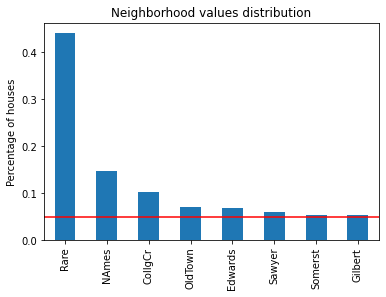

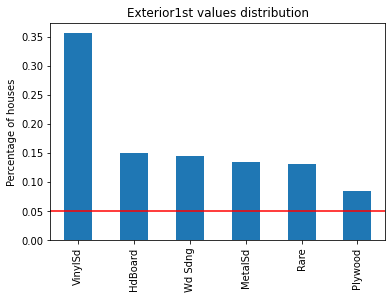

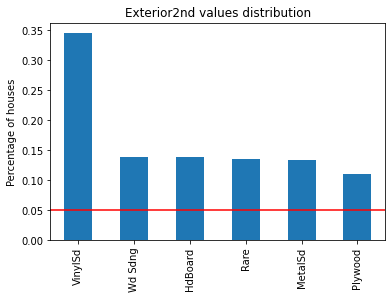

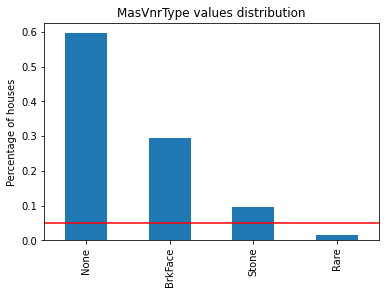

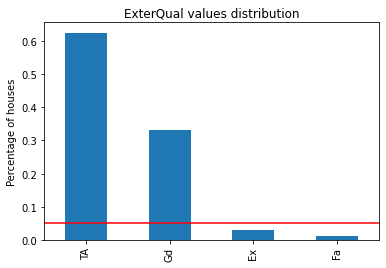

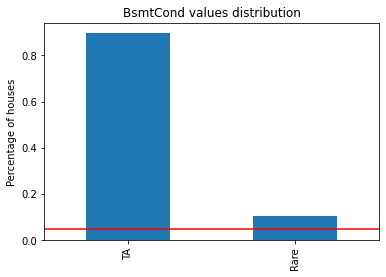

In [85]:
# plot and check
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'BsmtCond']:
    
    (X_train[col].value_counts(ascending=False)/len(X_train)).plot.bar()
    plt.axhline(y = 0.05, c= 'red')
    plt.title('{} values distribution'.format(col))
    plt.ylabel('Percentage of houses')
    plt.show()

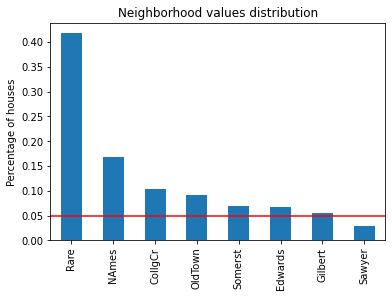

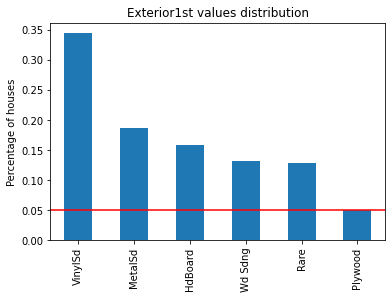

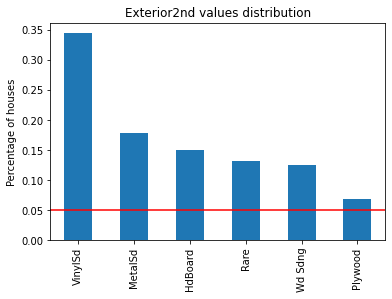

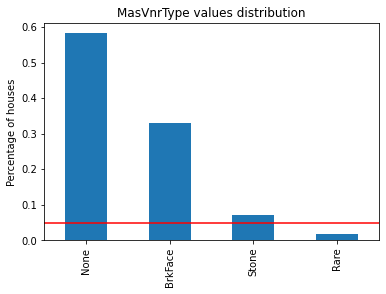

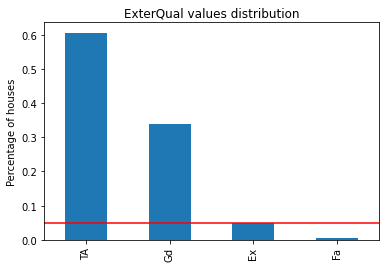

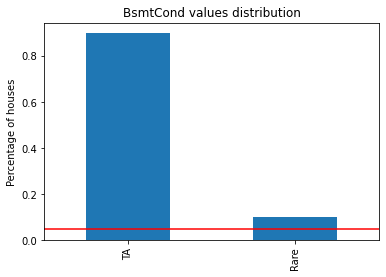

In [86]:
# for test data
# plot and check
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'BsmtCond']:
    
    (X_test[col].value_counts(ascending=False)/len(X_test)).plot.bar()
    plt.axhline(y = 0.05, c= 'red')
    plt.title('{} values distribution'.format(col))
    plt.ylabel('Percentage of houses')
    plt.show()